In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data

In [2]:
#loading the file
data=pd.read_csv("Twitter_data.csv")

In [3]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
#seeing the first 5 rows details of the dataset
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
#seeing that how many columns are present in the dataset
data.columns

Index(['clean_text', 'category'], dtype='object')

In [6]:
#seeing the no. of rows and columns present in the dataset 
data.shape

(162980, 2)

In [7]:
#seeing how many elements are present in the dataset
data.size

325960

In [8]:
#seeing what information did the dataset is giving(example: columns,datatypes non null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [9]:
#seeing the count ,mean,min and more other information of each column in data set
data.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# cleaning and analyzing the data

In [10]:
#finding that how many null values are present in the dataset 
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [11]:
#finding how many not null values are present in the dataset 
data.notnull().sum()

clean_text    162976
category      162973
dtype: int64

In [12]:
#finding how many duplicates values are present in the dataset 
data.duplicated().sum()

2

In [13]:
# Fill missing values in the 'clean_text' column with empty strings
data['clean_text'].fillna('', inplace=True)

In [14]:
# Drop rows with missing values in the 'category' column
data.dropna(subset=['category'], inplace=True)

In [15]:
# Confirming the changes
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [16]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Sentiment Analysis

In [17]:
data['category']=data['category'].replace(-1,'negative')
data['category']=data['category'].replace(1,'positive')
data['category']=data['category'].replace(0,'nuteral')

In [18]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,nuteral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,negative
162976,dear rss terrorist payal gawar what about modi...,negative
162977,did you cover her interaction forum where she ...,nuteral
162978,there big project came into india modi dream p...,nuteral


# Natural Language Processing (NLP)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# Replace 'df' with the name of your DataFrame containing the dataset
X = data['clean_text']
y = data['category']

In [21]:
# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Machine learning algorithm 

In [23]:
# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Predict the categories for the test set
y_pred = classifier.predict(X_test)

In [25]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


In [26]:
accuracy

0.8334407117656082

# Feature engineering

In [27]:
import re
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# Text cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text
data['clean_text'] = data['clean_text'].apply(clean_text)

In [29]:
# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['clean_text'].apply(word_tokenize)
data['tokens'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [30]:
# Stemming
stemmer = PorterStemmer()
data['stemmed_tokens'] = data['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [31]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)))
y = data['category']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# visualization

<Axes: xlabel='category'>

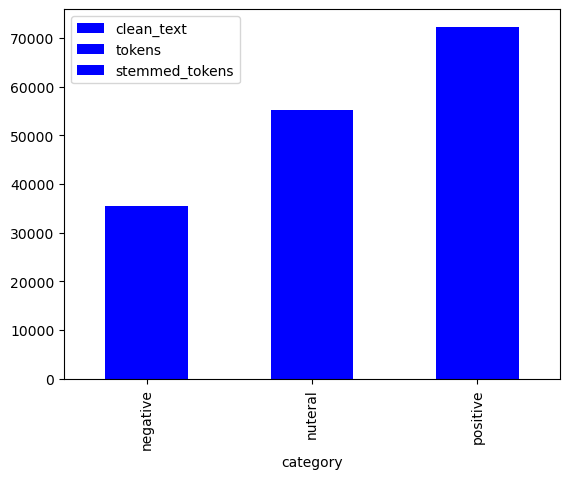

In [33]:
data.groupby('category').count().plot(kind='bar',color = 'blue')


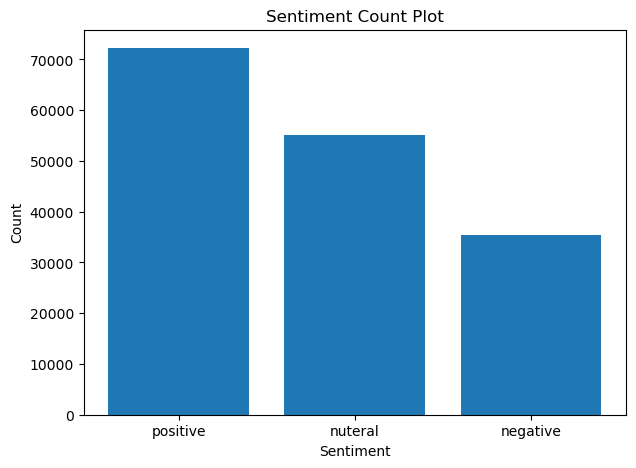

In [34]:
sentiment_counts =data['category'].value_counts()
# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

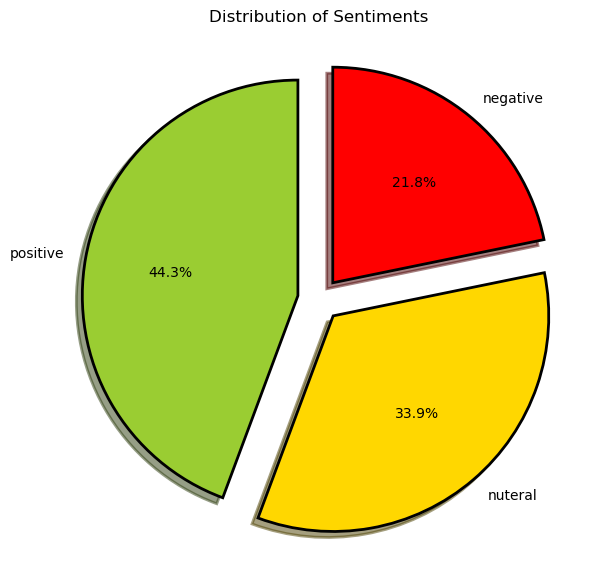

In [35]:
tags = data['category'].value_counts()


# Colors for the pie chart wedges
colors = ("yellowgreen", "gold", "red")

# Wedge properties
wp = {'linewidth': 2, 'edgecolor': "black"}

# Calculate the number of unique sentiment categories
num_categories = len(tags)

# Explode the wedges (separate a few slices)
explode = [0.1] * num_categories

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90, wedgeprops=wp, explode=explode)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()